In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata.head()
study_results.head()

# Combine the data into a single dataset

# Display the data table for preview


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [2]:
study_results.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
#Combine dataset into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
#Display datatable for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
merge_df_outer = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
merge_df_outer

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
#Checking the number of mice
Number_Mice = merge_df["Mouse ID"].count()
Number_Mice

1893

In [7]:
# Create dataframe for Mouse ID and Timepoint

duplicate_mice_df = pd.DataFrame(merge_df, 
                                columns = [ "Mouse ID", "Timepoint"])
duplicate_mice_df

,Mouse ID,Timepoint
0,k403,0
1,k403,5
2,k403,10
3,k403,15
4,k403,20
...,...,...
1888,z969,25
1889,z969,30
1890,z969,35
1891,z969,40


In [8]:
duplicate_data = duplicate_mice_df[duplicate_mice_df.duplicated()]
print("Duplicate Rows based on Mouse ID and Timepoint")

Duplicate Rows based on Mouse ID and Timepoint


In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_data

,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [10]:
# Finding data for duplicate rows
dup_df = merge_df.set_index("Mouse ID")
dup_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [11]:
dup_dup = merge_df[merge_df["Timepoint"].isin([0, 5, 10, 15, 20])]
dup_dup

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,0,45.000000,0
1884,z969,Naftisol,Male,9,30,5,49.332999,0
1885,z969,Naftisol,Male,9,30,10,52.656081,1
1886,z969,Naftisol,Male,9,30,15,54.713005,2


In [12]:
mice_df = pd.DataFrame(merge_df)
mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [13]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
final_df = mice_df.drop(mice_df.index[[908, 909, 910, 911, 912, 913, 914, 915, 916, 917]])
final_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [14]:
# Checking the number of mice in the clean DataFrame.

total_mice = len(final_df["Mouse ID"].unique())
total_mice

249

In [15]:

total_rows = len(final_df.index)
total_rows

1883

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [17]:
# regimens df

regimen_check = pd.DataFrame(final_df, columns = ["Drug Regimen"])
regimen_check

,Drug Regimen
0,Ramicane
1,Ramicane
2,Ramicane
3,Ramicane
4,Ramicane
...,...
1888,Naftisol
1889,Naftisol
1890,Naftisol
1891,Naftisol


In [18]:
# groupby regimen

grouped_regimen_df = regimen_check.groupby(["Drug Regimen"])
print(grouped_regimen_df)

#visualize regimen

grouped_regimen_df.count()


""
Drug Regimen
Capomulin
Ceftamin
Infubinol
Ketapril
Naftisol
Placebo
Propriva
Ramicane
Stelasyn


In [19]:
# DataFrame for Regimen and Tumor Volume

df1 = pd.DataFrame(final_df,
                  columns = ["Drug Regimen", "Tumor Volume (mm3)"])
df1

,Drug Regimen,Tumor Volume (mm3)
0,Ramicane,45.000000
1,Ramicane,38.825898
2,Ramicane,35.014271
3,Ramicane,34.223992
4,Ramicane,32.997729
...,...,...
1888,Naftisol,63.145652
1889,Naftisol,65.841013
1890,Naftisol,69.176246
1891,Naftisol,70.314904


In [20]:
regimen_mean = df1.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg([np.mean, np.std, np.var])
regimen_mean

,mean,std,var
Drug Regimen,,,
Capomulin,40.675741,4.994774,24.947764
Ceftamin,52.591172,6.268188,39.290177
Infubinol,52.884795,6.567243,43.128684
Ketapril,55.235638,8.279709,68.553577
Naftisol,54.331565,8.134708,66.173479
Placebo,54.033581,7.821003,61.168083
Propriva,52.458254,6.637293,44.053659
Ramicane,40.216745,4.846308,23.486704
Stelasyn,54.233149,7.710419,59.450562


In [21]:
# calculate sem
regimen_sem = df1.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
regimen_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.540135
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [22]:
#calculate median

regimen_median = df1.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg([np.median])
regimen_median

,median
Drug Regimen,
Capomulin,41.557809
Ceftamin,51.776157
Infubinol,51.820584
Ketapril,53.698743
Naftisol,52.509285
Placebo,52.288934
Propriva,50.854632
Ramicane,40.673236
Stelasyn,52.431737


In [23]:
# Assemble the resulting series into a single summary dataframe.

summary_df = regimen_mean.join(regimen_median)
summary_df = summary_df.join(regimen_sem)
summary_df

,mean,std,var,median,Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,4.994774,24.947764,41.557809,0.329346
Ceftamin,52.591172,6.268188,39.290177,51.776157,0.469821
Infubinol,52.884795,6.567243,43.128684,51.820584,0.492236
Ketapril,55.235638,8.279709,68.553577,53.698743,0.603860
Naftisol,54.331565,8.134708,66.173479,52.509285,0.596466
Placebo,54.033581,7.821003,61.168083,52.288934,0.581331
Propriva,52.458254,6.637293,44.053659,50.854632,0.540135
Ramicane,40.216745,4.846308,23.486704,40.673236,0.320955
Stelasyn,54.233149,7.710419,59.450562,52.431737,0.573111


In [55]:
#Rename columns for summary dataframe

summary_df = summary_df.rename(columns={"mean": "Mean", "std": "Standard Deviation", "var": "Variance", "median": "Median", "Tumor Volume (mm3)": "SEM"})

summary_df

,Mean,Standard Deviation,Variance,Median,SEM
Drug Regimen,,,,,
Capomulin,40.675741,4.994774,24.947764,41.557809,0.329346
Ceftamin,52.591172,6.268188,39.290177,51.776157,0.469821
Infubinol,52.884795,6.567243,43.128684,51.820584,0.492236
Ketapril,55.235638,8.279709,68.553577,53.698743,0.603860
Naftisol,54.331565,8.134708,66.173479,52.509285,0.596466
Placebo,54.033581,7.821003,61.168083,52.288934,0.581331
Propriva,52.458254,6.637293,44.053659,50.854632,0.540135
Ramicane,40.216745,4.846308,23.486704,40.673236,0.320955
Stelasyn,54.233149,7.710419,59.450562,52.431737,0.573111


In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [25]:

maxtimepoint = final_df.groupby("Mouse ID").max()["Timepoint"]
maxtimepoint

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

In [26]:
last_tumor_volume = final_df.groupby("Mouse ID").last()["Tumor Volume (mm3)"]
last_tumor_volume

Mouse ID
a203    67.973419
a251    65.525743
a262    70.717621
a275    62.999356
a366    63.440686
          ...    
z435    48.710661
z578    30.638696
z581    62.754451
z795    65.741070
z969    73.867845
Name: Tumor Volume (mm3), Length: 249, dtype: float64

In [27]:
regimen_need = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
regimen = final_df.groupby("Mouse ID").last()["Drug Regimen"]
create_df = pd.DataFrame({"Drug Regimen": regimen, "Timepoint": maxtimepoint, "Tumor Volume (mm3)": last_tumor_volume})
create_df = create_df.loc[create_df["Drug Regimen"].isin(regimen_need)]
create_df

,Drug Regimen,Timepoint,Tumor Volume (mm3)
Mouse ID,,,
a203,Infubinol,45,67.973419
a251,Infubinol,45,65.525743
a275,Ceftamin,45,62.999356
a411,Ramicane,45,38.407618
a444,Ramicane,45,43.047543
...,...,...,...
y769,Ceftamin,45,68.594745
y793,Capomulin,45,31.896238
y865,Ceftamin,45,64.729837


In [28]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
tumor_need = create_df["Tumor Volume (mm3)"]
quartiles = tumor_need.quantile([.25, .50, .75])
quartiles

0.25    37.187744
0.50    45.000000
0.75    59.930262
Name: Tumor Volume (mm3), dtype: float64

In [29]:
#IQR
lower_q = quartiles[0.25]
upper_q = quartiles[0.75]
iqr = upper_q - lower_q
iqr

22.74251795250001

In [57]:
#Outliers
lower_outlier = lower_q - (1.5*iqr)
upper_outlier = upper_q + (1.5*iqr)
print(f"Values below {lower_outlier} and above {upper_outlier} are potential outliers." )

Values below 3.0739668737499812 and above 94.04403868375002 are potential outliers.


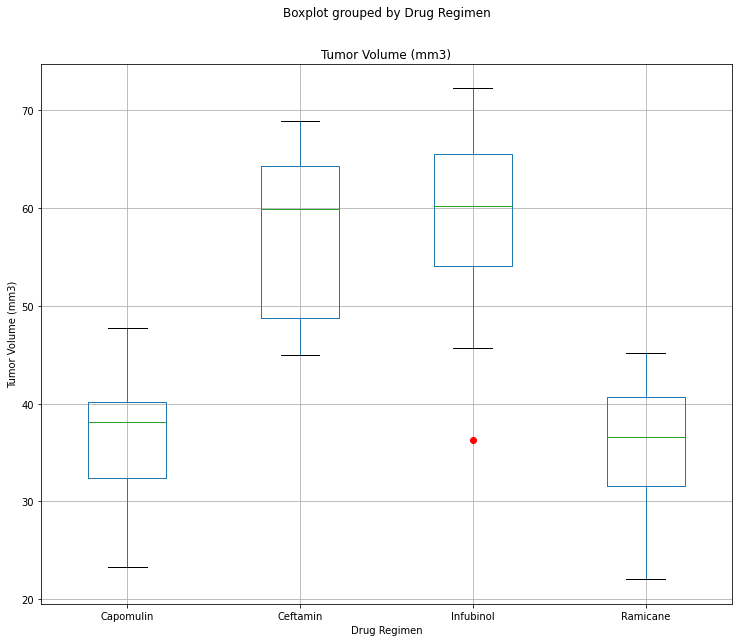

In [30]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

box_plot = create_df.boxplot(by="Drug Regimen", column = "Tumor Volume (mm3)", sym="r", figsize=(12,10))
box_plot.set_ylabel("Tumor Volume (mm3)")
plt.show()

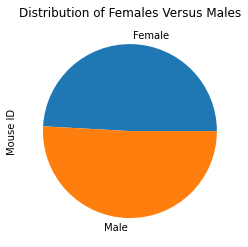

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_dist = final_df.groupby('Sex').count()['Mouse ID']
sex_dist_df = pd.DataFrame(sex_dist)
sex_dist_df
plt.pie(sex_dist, labels=sex_dist.index),
plt.title("Distribution of Females Versus Males")
plt.ylabel("Mouse ID")
plt.show()


In [58]:
# Pie plot using pyplot

gender = final_df.groupby("Sex").count()
gender

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,925,925,925,925,925,925,925
Male,958,958,958,958,958,958,958


In [60]:


get_list = list(gender.index)
get_list

['Female', 'Male']

In [62]:
size = [gender["Mouse ID"]]
size

[Sex
 Female    925
 Male      958
 Name: Mouse ID, dtype: int64]

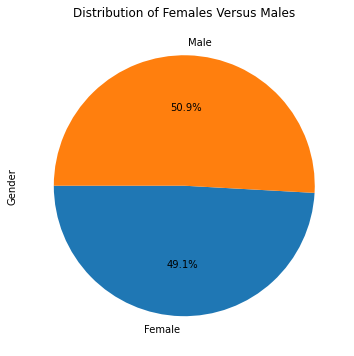

In [63]:
pie2 = gender["Mouse ID"].plot.pie(y='size', figsize=(6,6), autopct ="%1.1f%%", startangle=180)
plt.title("Distribution of Females Versus Males")
plt.ylabel('Gender')
plt.show()

In [32]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
regimen_bar = final_df.groupby(['Drug Regimen'])['Mouse ID'].count()
regimen_bar


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     151
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

Text(0, 0.5, 'Number of Mice')

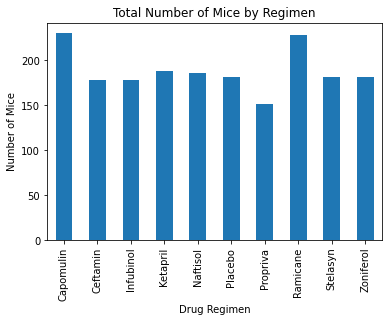

In [33]:
plotdata = pd.DataFrame({"mice":[230, 178, 178, 188, 186, 181, 151, 228, 181, 182]}, index = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"])

plt.xticks(rotation=60, horizontalalignment="center")
plotdata["mice"].plot(kind="bar", title = "test")
plt.title("Total Number of Mice by Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")


Text(0, 0.5, 'Number of Mice')

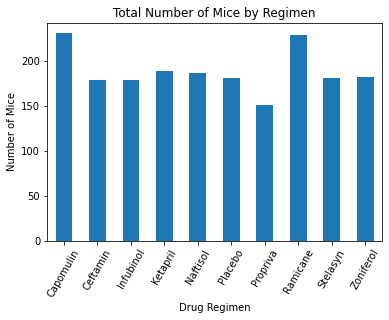

In [34]:
test1 = final_df.groupby("Drug Regimen").count()["Mouse ID"]
micebar = pd.DataFrame(test1)

regbar = micebar.plot.bar(legend=False,rot=60)
plt.title("Total Number of Mice by Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")


In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [36]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin 
   cap_df1 = pd.DataFrame(final_df, columns = ["Drug Regimen", "Mouse ID"])
   cap_df1

,Drug Regimen,Mouse ID
0,Ramicane,k403
1,Ramicane,k403
2,Ramicane,k403
3,Ramicane,k403
4,Ramicane,k403
...,...,...
1888,Naftisol,z969
1889,Naftisol,z969
1890,Naftisol,z969
1891,Naftisol,z969


In [37]:
cap1 = cap_df1.groupby(['Drug Regimen', 'Mouse ID'])
cap1

In [38]:
cap1.count()

Empty DataFrame
Columns: []
Index: [(Capomulin, b128), (Capomulin, b742), (Capomulin, f966), (Capomulin, g288), (Capomulin, g316), (Capomulin, i557), (Capomulin, i738), (Capomulin, j119), (Capomulin, j246), (Capomulin, l509), (Capomulin, l897), (Capomulin, m601), (Capomulin, m957), (Capomulin, r157), (Capomulin, r554), (Capomulin, r944), (Capomulin, s185), (Capomulin, s710), (Capomulin, t565), (Capomulin, u364), (Capomulin, v923), (Capomulin, w150), (Capomulin, w914), (Capomulin, x401), (Capomulin, y793), (Ceftamin, a275), (Ceftamin, b447), (Ceftamin, b487), (Ceftamin, b759), (Ceftamin, f436), (Ceftamin, h531), (Ceftamin, j296), (Ceftamin, k210), (Ceftamin, l471), (Ceftamin, l490), (Ceftamin, l558), (Ceftamin, l661), (Ceftamin, l733), (Ceftamin, o287), (Ceftamin, p438), (Ceftamin, q483), (Ceftamin, t573), (Ceftamin, u149), (Ceftamin, u153), (Ceftamin, w151), (Ceftamin, x226), (Ceftamin, x581), (Ceftamin, x822), (Ceftamin, y769), (Ceftamin, y865), (Infubinol, a203), (Infubinol, a251), (Infubinol, a577), (Infubinol, a685), (Infubinol, c139), (Infubinol, c326), (Infubinol, c895), (Infubinol, e476), (Infubinol, f345), (Infubinol, i386), (Infubinol, k483), (Infubinol, k804), (Infubinol, m756), (Infubinol, n671), (Infubinol, o809), (Infubinol, o813), (Infubinol, q132), (Infubinol, s121), (Infubinol, v339), (Infubinol, v719), (Infubinol, v766), (Infubinol, w193), (Infubinol, w584), (Infubinol, y163), (Infubinol, z581), (Ketapril, a457), (Ketapril, c580), (Ketapril, c819), (Ketapril, c832), (Ketapril, d474), (Ketapril, f278), (Ketapril, f932), (Ketapril, g107), (Ketapril, g497), (Ketapril, h246), (Ketapril, h428), (Ketapril, k382), (Ketapril, l264), (Ketapril, m550), (Ketapril, m650), (Ketapril, n923), (Ketapril, o331), (Ketapril, o973), (Ketapril, p189), (Ketapril, q119), (Ketapril, u327), (Ketapril, v289), (Ketapril, v603), (Ketapril, w422), (Ketapril, y260), ...]

[249 rows x 0 columns]

In [39]:
cap_mouse_df = final_df.loc[final_df["Mouse ID"] == "g316",:]
cap_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
351,g316,Capomulin,Female,22,22,0,45.000000,0
352,g316,Capomulin,Female,22,22,5,44.022752,0
353,g316,Capomulin,Female,22,22,10,44.502042,0
354,g316,Capomulin,Female,22,22,15,45.216743,0
355,g316,Capomulin,Female,22,22,20,45.933322,1


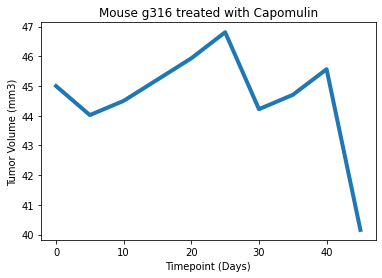

In [40]:
x_axisTimePoint = cap_mouse_df["Timepoint"]
tumorvol = cap_mouse_df["Tumor Volume (mm3)"]

plt.title('Mouse g316 treated with Capomulin')
plt.plot(x_axisTimePoint, tumorvol, linewidth=4)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')


plt.show()

In [41]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

cap_str = final_df.loc[final_df["Drug Regimen"] == "Capomulin"]

print(cap_str)

     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
10       s185    Capomulin  Female           3          17          0   
11       s185    Capomulin  Female           3          17          5   
12       s185    Capomulin  Female           3          17         10   
13       s185    Capomulin  Female           3          17         15   
14       s185    Capomulin  Female           3          17         20   
...       ...          ...     ...         ...         ...        ...   
440      i557    Capomulin  Female           1          24         45   
1452     r157    Capomulin    Male          22          25          0   
1453     r157    Capomulin    Male          22          25          5   
1454     r157    Capomulin    Male          22          25         10   
1455     r157    Capomulin    Male          22          25         15   

      Tumor Volume (mm3)  Metastatic Sites  
10             45.000000                 0  
11             43.878496         

In [42]:
# create dataset for AVerage Tumor Volume and group by weight
cap_str_df = cap_str.groupby(['Mouse ID']).mean()
cap_str_df

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


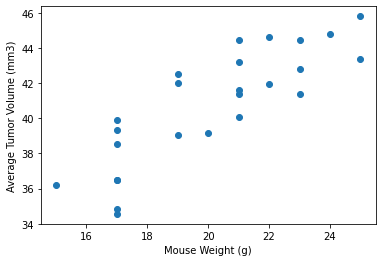

In [43]:
#scatter plot

plt.scatter(cap_str_df['Weight (g)'], cap_str_df['Tumor Volume (mm3)'])
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


plt.show()

In [44]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

In [45]:
#Correlation Coeffient 

correlation = st.pearsonr(cap_str_df['Weight (g)'], cap_str_df['Tumor Volume (mm3)'])
corr = round(st.pearsonr(cap_str_df['Weight (g)'], cap_str_df['Tumor Volume (mm3)'])[0],2)
print(f"The correlation coefficient for mouse weight and average tumor volume is {corr}")

The correlation coefficient for mouse weight and average tumor volume is 0.84


In [46]:
# Linear Regression

regression_model = st.linregress(cap_str_df['Weight (g)'], cap_str_df['Tumor Volume (mm3)'])
regression_model

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)